### Prepare model results dataset for visualization 

In [15]:
import pandas as pd
df = pd.read_csv('dataset_from_model.csv')
df = df[df.state!='US']
df.shape

(3000, 10)

In [16]:
# To dupplicate the 2021 CO2 reading and add it to every option and show 2021 as starting point the forcast.
dfo = pd.DataFrame()
for o in df.option.unique():
    if o != 'default':
        dfo = df[(df.year==2021) & (df.option=='default')]
        dfo['option'] = o
        df = pd.concat([df,dfo])

df.sort_values(by=['state','year','option'], inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df.to_csv('final_viz_dataset.csv', index = False, encoding='utf-8')

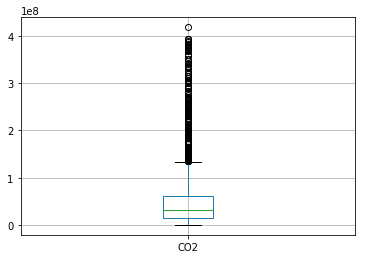

In [18]:
bp = df.boxplot('CO2',return_type='dict')

In [19]:
w =  [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [21]:
# to use q1 and q3 for the color range used in the choropleth map 
q1, q3= w[0][0],w[1][0]
print(q1, q3)

13829185.768675786 61810381.22790544
